## EDA

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

In [49]:
# Importa los datasets de score y titles
score = pd.read_parquet('processed_data/score.parquet')
titles = pd.read_parquet('processed_data/titles.parquet')
S = pd.read_parquet('processed_data/S.parquet')

In [12]:
print(score.shape)
score.tail(2)

(11024289, 4)


,userId,movieId,score,platform
11024287,124380,ns7881,4,netflix
11024288,124380,as883,1,amazon


In [13]:
titles.tail(2) # No coinciden los encabezados de ambos datasets para movieId e id

,id,platform,type,title,director,cast,country,date_added,release_year,duration_int,duration_type,listed_in,description
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."
22997,ns8807,netflix,movie,zubaan,mozez singh,"vicky kaushal, sarah-jane dias, raaghav chanan...",india,2019-03-02,2015,111,min,"dramas, international movies, music & musicals",a scrappy but poor boy worms his way into a ty...


In [105]:
# Peliculas por plataforma

moviesByP = score.groupby('platform').agg(pd.Series({'movieId': 'count'}))
# moviesByP.boxplot()
fig = plt.figure(figsize=(4,4))
fig, ax = plt.subplots()
plt.bar(moviesByP.index, moviesByP['movieId'].values)
# ax.set_xlabel('Platform')
# ax.set_ylabel('Number of titles')
# ax.set_title('Titles per platform')
plt.show()
# sns.barplot(moviesByP)


In [142]:
titles_p =  moviesByP.reset_index()
titles_p.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  4 non-null      object
 1   movieId   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [144]:
#create the figure 
plt.figure(figsize=(4,4))

# calculate average age
avg_age = titles_p['movieId'].count()


# create the plot
plt.bar('movieId', avg_age)


# display the plot
plt.show()

In [134]:
titles_p['movieId'].values

array([4631850,  694790, 1472788, 4224861])

In [135]:
# Make a random dataset:
height = [4631850,  694790, 1472788, 4224861]
bars = ['amazon', 'disney', 'hulu', 'netflix']


# Create bars
plt.bar(bars, height)


<BarContainer object of 4 artists>

In [136]:
sns.barplot(data=titles_p) # hue="platform"

<Axes: title={'center': 'movieId'}>

In [103]:
moviesByP['movieId'].values

array([4631850,  694790, 1472788, 4224861])

In [29]:
# Filtra las columnas userId, movieId y score del dataset score y las columnas id y title del dataset title.
score = score[['userId','movieId','score','platform']]
titles = titles[['id','title']]
titles = titles.rename(columns={'id':'movieId'}) # Cambia el nombre para que haya coincidencia
df_title = titles[['movieId','title']]
df_title.tail(2)

,movieId,title
22996,ns8806,zoom
22997,ns8807,zubaan


In [30]:
# Unifica los datasets en df
df = pd.merge(score,titles,how='left',on='movieId')
scores_amount = len(df)-1
df.tail(2)

,userId,movieId,score,platform,title
11024287,124380,ns7881,4,netflix,rocky ii
11024288,124380,as883,1,amazon,storm boy


In [31]:
# Score agrupado por pelicula (min = 3.3, max = 3.72)
scoreByP = df.groupby(by=['movieId','platform']).mean()
maxAvgScore = scoreByP['score'].max()
minAvgScore = scoreByP['score'].min()
scoreByP.head(2)

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_24249/247152141.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scoreByP = df.groupby(by=['movieId','platform']).mean()


,,userId,score
movieId,platform,,
as1,amazon,99178.623506,3.330677
as10,amazon,92915.883041,3.307992


In [53]:
# Usuarios únicos 115077
print('users:',len(score['userId'].unique()))
usersAmount = len(score['userId'].unique())
# Calificaciones de películas por usuario
scoresByUser = score.groupby(['userId']).count()
scoresByUser.tail()

users: 115077


115077

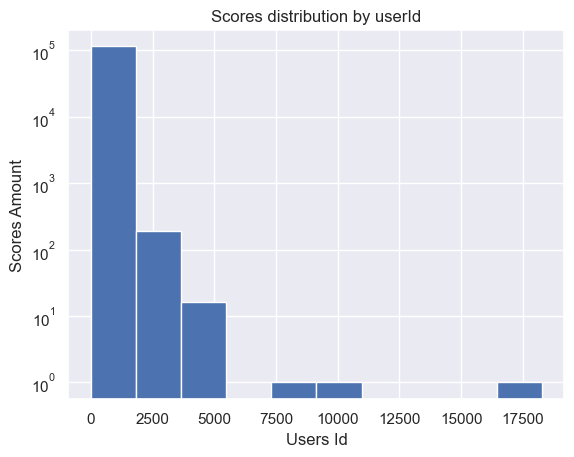

In [54]:
# Distribucion de calificaciones por usuario
plt.hist(scoresByUser.score, log= True)
plt.title('Scores distribution by userId')  
plt.ylabel("Scores Amount")      # Adjust the label of the y-axis
plt.xlabel("Users Id")              # # Adjust the label of the x-axis
plt.show()

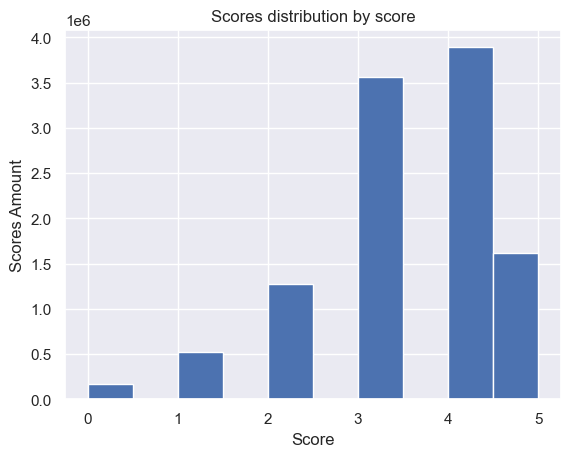

In [55]:
# Distribución de las cantidades de calificaciones
score['score'].hist()
plt.title('Scores distribution by score')
plt.ylabel("Scores Amount")      # Adjust the label of the y-axis
plt.xlabel("Score")              # Adjust the label of the x-axis
plt.show()

In [56]:
# Calificaciones por pelicula
print('movies:',len(score['movieId'].unique()))     # Cantidad de peliculas/series: 22998
scoresByMovie = score.groupby(['movieId']).count()  # Agrupar por peliculas/series  
maxAmountScores = scoresByMovie['score'].max()      # Agrupacion maxima: 576
scoresByMovie.head(2)

movies: 22998


,userId,score,platform
movieId,,,
as1,502,502,502
as10,513,513,513


In [58]:
# Peliculas/series con mas y menos calificaciones
idx_max = scoresByMovie['userId'].idxmax()                  # Index de maxima cantidad de scores (576): as4197
print('movieId with maximum amount of scores:',idx_max) 
maxAmountScores = scoresByMovie['score'].max()              # Maxima cantidad de scores: 576
movieIdMaxAmountScores = idx_max                            # movieId con maxima cantidad de scores: as4197
idx_min = scoresByMovie['userId'].idxmin()                  # Index de minimo Id de usuario (396): as4940
print('movieId with minimum amount of scores:',idx_min)
minAmountScores = scoresByMovie['score'].min()              # Minima cantidad de scores: 396
movieIdMinAmountScores = idx_min                            # movieId con minima cantidad de scores: as4940

movieId with maximum amount of scores: as4197
movieId with minimum amount of scores: as4940


In [59]:
# df_v: Peliculas/series ordenadas por mas a menos calificaciones
df_v = df.groupby(['movieId']).count()
df_v.sort_values('userId', ascending = False, inplace = True)
df_v['viewed'] = df_v['userId']
df_v.drop(columns = ['userId','score','platform','title'], inplace = True)
df_v.head()

,viewed
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556


In [60]:
# Agrega los title al df_v
titles = titles.set_index('movieId')
df_v['title'] = titles.loc[df_v.index].title
df_v

,viewed,title
movieId,,
as4197,576,from other worlds
as9065,560,the organization
ns7279,558,"leapfrog: sing-along, read-along"
as848,558,superbook
hs2360,556,dietland
...,...,...
hs599,404,dave
ns6535,402,cop and a half: new recruit
hs1711,401,i am alone


In [61]:
movieMaxAmountScores = df_v.loc[movieIdMaxAmountScores, 'title'] 
movieMinAmountScores = df_v.loc[movieIdMinAmountScores, 'title'] 
print('Movie with Maximum amount of scores:',movieMaxAmountScores)
print('Movie with Minimum amount of scores:',movieMinAmountScores)

Movie with Maximum amount of scores: from other worlds
Movie with Minimum amount of scores: mitzi (nbc 1968)


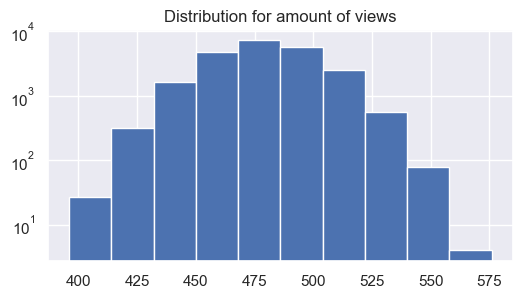

In [62]:
# Grafica la cantidad de vistas
plt.figure(figsize = (6,3))
df_v.viewed[df_v.viewed<600].hist(log = True)
plt.title('Distribution for amount of views')
plt.show()

## Conclusiones

In [ ]:
# df.to_csv('data/merge.csv', index=False)
df.to_parquet('data/merge.parquet', index=False)

In [ ]:
df_title.to_csv('data/df_title.csv', index=False)

In [64]:
print('EDA conclusions:')
print('Users amount:',usersAmount)
print('Scores amount:',scores_amount)
print('Maximum Average Score (by platform)',maxAvgScore)
print('Minimum Average Score (by platform)',minAvgScore)
print('Maximum amount of scores in a movie:', maxAmountScores)
print('Minimum amount of scores in a movie:', minAmountScores)
print('Movie Id with maximum amount of scores:',movieIdMaxAmountScores)
print('Movie Id with minimum amount of scores:',movieIdMinAmountScores)
print('Movie with Maximum amount of scores:',movieMaxAmountScores)
print('Movie with Minimum amount of scores:',movieMinAmountScores)

EDA conclusions:
Users amount: 115077
Scores amount: 11024288
Maximum Average Score (by platform) 3.5866666666666664
Minimum Average Score (by platform) 3.1799163179916317
Maximum amount of scores in a movie: 576
Minimum amount of scores in a movie: 396
Movie Id with maximum amount of scores: as4197
Movie Id with minimum amount of scores: as4940
Movie with Maximum amount of scores: from other worlds
Movie with Minimum amount of scores: mitzi (nbc 1968)
